In [138]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel, RFE, RFECV, SelectKBest, chi2, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from scipy.stats import boxcox
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv('./data/madelon_train.data', 
                         sep = ' ', header = None).drop(500, axis = 1)

In [3]:
train_labels = pd.read_csv('./data/madelon_train.labels', sep = ' ', header = None)

In [4]:
val_data = pd.read_csv('./data/madelon_valid.data', 
                         sep = ' ', header = None).drop(500, axis = 1)
val_labels = pd.read_csv('./data/madelon_valid.labels', sep = ' ', header = None)

In [5]:
test_data = pd.read_csv('./data/madelon_test.data', 
                         sep = ' ', header = None).drop(500, axis = 1)

In [6]:
train_data['target'] = train_labels

In [7]:
val_data['target'] = val_labels

In [8]:
df = train_data.append(val_data)

In [9]:
sub1 = df.sample((int(.1*(len(df)))), random_state = 22)

In [10]:
sub1.shape

(260, 501)

In [11]:
sub2 = df.sample((int(.1*(len(df)))), random_state = 8)

In [12]:
sub2.shape

(260, 501)

In [13]:
sub3 = df.sample((int(.1*(len(df)))), random_state = 10)

In [14]:
sub3.shape

(260, 501)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd3ef21898>]], dtype=object)

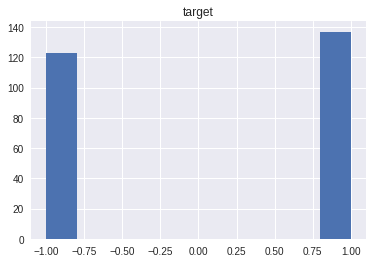

In [15]:
sub1.hist(column = 'target')

In [16]:
base_neg1 = 123/260

In [17]:
base_pos1 = 137/260

In [18]:
sub1['target'].value_counts()

 1    137
-1    123
Name: target, dtype: int64

In [19]:
predictors = sub1[sub1.columns[0:500]]
target = sub1[sub1.columns[500]]

In [20]:
predictors.shape

(260, 500)

In [21]:
target.shape

(260,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = .2, random_state = 42)

In [23]:
X_train_bc = pd.DataFrame()
X_test_bc = pd.DataFrame()
for col in X_train.columns:
    box_cox_trans_train, lmbda = boxcox(X_train[col])
    box_cox_trans_test = boxcox(X_test[col], lmbda)
    X_train_bc[col] = pd.Series(box_cox_trans_train)
    X_test_bc[col] = pd.Series(box_cox_trans_test)

/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: invalid value encountered in subtract
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1855: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)


# Feature Selection #

**Select From Model**

Logistic Regression as estimator with L2

In [68]:
scaler = StandardScaler()
lr_l2 = LogisticRegression(C = .0001)
sfm1 = SelectFromModel(lr_l2, threshold = 'mean')
pipe_sfm_lr = Pipeline([
    ('scaler', scaler),  
    ('sfm', sfm1) 
])

In [69]:
pipe_sfm_lr.fit(X_train_bc, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
        prefit=False, threshold='mean'))])

In [70]:
sfm1_feats = np.where(sfm1.get_support())[0]
sfm1_feats

array([  0,   3,   4,   5,   9,  11,  14,  16,  19,  21,  22,  28,  29,
        30,  31,  32,  33,  37,  39,  43,  46,  48,  49,  51,  52,  53,
        55,  57,  60,  62,  64,  67,  74,  77,  78,  81,  85,  86,  89,
        98,  99, 100, 105, 108, 113, 120, 121, 127, 128, 129, 133, 134,
       135, 138, 141, 143, 148, 149, 152, 156, 157, 158, 162, 164, 165,
       166, 167, 169, 174, 175, 176, 177, 181, 189, 190, 191, 196, 197,
       199, 202, 203, 204, 206, 207, 208, 212, 215, 218, 220, 221, 222,
       224, 225, 227, 228, 233, 237, 238, 241, 243, 246, 248, 253, 258,
       260, 263, 265, 267, 268, 271, 272, 273, 276, 278, 283, 284, 285,
       286, 289, 293, 294, 295, 296, 297, 301, 304, 305, 307, 310, 313,
       316, 318, 319, 321, 322, 324, 326, 328, 329, 330, 331, 336, 337,
       338, 339, 341, 345, 352, 354, 365, 368, 369, 374, 375, 378, 380,
       382, 383, 386, 388, 399, 400, 401, 406, 409, 412, 413, 414, 415,
       416, 417, 420, 421, 425, 426, 428, 429, 431, 432, 434, 43

In [71]:
len(sfm1_feats)

208

In [72]:
sfm1_feat_coef_ind = np.argsort(np.abs(sfm1.estimator_.coef_))[0][::-1]

In [73]:
sfm1_feat_coef_val = np.sort(np.abs(sfm1.estimator_.coef_))[0][::-1]
sfm1_feat_coef_val

array([  4.20818235e-03,   4.17028567e-03,   3.42803678e-03,
         3.40956947e-03,   2.21754458e-03,   2.14666481e-03,
         2.09637130e-03,   2.03920931e-03,   2.00227480e-03,
         1.98684275e-03,   1.95823074e-03,   1.92521143e-03,
         1.77081015e-03,   1.73789920e-03,   1.70397409e-03,
         1.70307732e-03,   1.65881048e-03,   1.60145497e-03,
         1.58566737e-03,   1.57189441e-03,   1.56927532e-03,
         1.55660464e-03,   1.54021947e-03,   1.53249673e-03,
         1.49511604e-03,   1.48814272e-03,   1.47292466e-03,
         1.47025713e-03,   1.46551087e-03,   1.46048105e-03,
         1.43259336e-03,   1.42299100e-03,   1.37196907e-03,
         1.35265517e-03,   1.34587169e-03,   1.33871502e-03,
         1.32763485e-03,   1.32615046e-03,   1.32253132e-03,
         1.31600257e-03,   1.30437311e-03,   1.30117368e-03,
         1.29895395e-03,   1.28849935e-03,   1.28830475e-03,
         1.28598064e-03,   1.28455445e-03,   1.27388346e-03,
         1.25773559e-03,

Reduced the space and size, but doesn't say anything about the top 20 features specifically.

Logistic Regression as estimator with L1

In [192]:
scaler = StandardScaler()
lr_l1 = LogisticRegression(penalty='l1', C = .1)
sfm2 = SelectFromModel(lr_l1)
pipe_sfm_lr_l1 = Pipeline([
    ('scaler', scaler),  
    ('sfm', sfm2) 
])

In [193]:
pipe_sfm_lr_l1.fit(X_train_bc, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sfm', SelectFromModel(estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        prefit=False, threshold=None))])

In [194]:
sfm2_feats = np.where(sfm2.get_support())[0]
sfm2_feats

array([  3,   5,   9,  11,  33, 105, 121, 129, 165, 191, 212, 224, 237,
       241, 260, 268, 278, 283, 285, 289, 307, 319, 331, 354, 369, 378,
       388, 399, 421, 428, 431, 446, 485, 491, 495])

In [195]:
len(sfm2_feats)

35

In [196]:
sfm2_feat_coef_ind = np.argsort(np.abs(sfm2.estimator_.coef_))[0][::-1]

In [197]:
sfm2_feat_coef_val = np.sort(np.abs(sfm2.estimator_.coef_))[0][::-1]
sfm2_feat_coef_val[0:50]

array([ 0.65408697,  0.18531013,  0.18190207,  0.17747564,  0.14746289,
        0.14522478,  0.14182102,  0.13159951,  0.11720184,  0.08680062,
        0.06802265,  0.0678929 ,  0.05869917,  0.05823517,  0.05785975,
        0.05136264,  0.0499949 ,  0.04730833,  0.04081627,  0.04025121,
        0.03958758,  0.03817224,  0.0361136 ,  0.03305697,  0.03054276,
        0.02916907,  0.0270442 ,  0.02647882,  0.02467327,  0.02406629,
        0.02333551,  0.0204497 ,  0.01006961,  0.00527402,  0.00490921,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

Interesting...L1 penalty is much better for feature selection in general

READ DOCUMENTATION to determine if you can use a regression estimator for a classification problem

** SelectKBest **

In [99]:
scaler = StandardScaler()
skb = SelectKBest(f_classif, k = 35)
pipe_fs_skb = Pipeline([
    ('scaler', scaler),  
    ('skb', skb) 
])

f_classif vs chi2 vs others
- keep in mind different scoring functions

In [100]:
pipe_fs_skb.fit(X_train_bc, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('skb', SelectKBest(k=35, score_func=<function f_classif at 0x7fdd1d8eb158>))])

In [101]:
skb.pvalues_

array([  2.83528439e-01,   7.30320175e-01,   9.49602251e-01,
         1.66190257e-02,   2.04954483e-01,   6.24578091e-02,
         6.63175561e-01,   5.73031496e-01,   4.28581784e-01,
         8.56507988e-02,   7.65484894e-01,   2.83495344e-02,
         7.67388441e-01,   5.19180489e-01,   1.39086203e-01,
         7.08837736e-01,   2.77413396e-01,   7.23854282e-01,
         8.11644701e-01,   3.17423255e-01,   8.20207891e-01,
         2.93872925e-01,   2.53144100e-01,   4.32966837e-01,
         7.99123813e-01,   4.80153092e-01,   9.21018824e-01,
         5.66202185e-01,   1.76983837e-01,   3.10611128e-01,
         1.04852039e-01,   2.53427245e-01,   2.87769443e-01,
         4.57017035e-03,   7.14437616e-01,   5.72407358e-01,
         9.82701505e-01,   8.29916856e-02,   4.14031413e-01,
         2.88356643e-01,   9.11317814e-01,   6.19687408e-01,
         8.39053061e-01,   2.20341932e-01,   3.98629782e-01,
         9.13439302e-01,   1.56149981e-01,   5.26756046e-01,
         8.09096831e-02,

In [102]:
skb.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,

In [103]:
skb_feats = np.where(skb.get_support())[0]
skb_feats

array([  3,  11,  33,  64, 105, 120, 121, 128, 165, 167, 175, 189, 191,
       212, 224, 241, 260, 268, 271, 278, 283, 285, 289, 297, 307, 319,
       331, 336, 338, 354, 369, 399, 421, 468, 475])

** RFE **

Logistic Regression with L1 penalty

In [125]:
scaler = StandardScaler()
rfe1 =RFECV(estimator = lr_l1, step = 1, cv = 5, scoring = 'accuracy')
pipe_rfe1 = Pipeline([
    ('scaler', scaler),  
    ('rfe1', rfe1) 
])

In [132]:
pipe_rfe1.fit(X_train_bc, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfe1', RFECV(cv=5,
   estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0))])

In [133]:
rfe1.n_features_

1

In [128]:
rfe1.estimator_.coef_

array([[ 0.69569657]])

In [129]:
rfe1_feat_coef_ind = np.argsort(np.abs(rfe1.estimator_.coef_))[0][::-1]
rfe1_feat_coef_ind

array([0])

In [130]:
rfe1_feat_coef_val = np.sort(np.abs(rfe1.estimator_.coef_))[0][::-1]
rfe1_feat_coef_val

array([ 0.69569657])

Eliminates all the way down to one feature, this is odd

In [141]:
scaler = StandardScaler()
rfe2 = RFECV(estimator = RandomForestClassifier(), step = 1, cv = 5, scoring = 'accuracy')
pipe_rfe2 = Pipeline([
    ('scaler', scaler),  
    ('rfe2', rfe2) 
])

In [142]:
pipe_rfe2.fit(X_train_bc, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfe2', RFECV(cv=5,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_s...one,
            verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0))])

In [200]:
X_train_bc.shape

(208, 500)

In [201]:
rfe2.n_features_

287

In [206]:
rfe2.support_.sum()

287

In [202]:
len(rfe2.estimator_.feature_importances_)

287

In [210]:
rfe2_feat_coef_ind = np.argsort(rfe2.estimator_.feature_importances_)[::-1]
rfe2_feat_coef_ind[rfe2_feat_coef_val > 0]

array([286, 132, 151, 184,   8, 196,  19, 213, 112, 136, 171, 139, 176,
        99, 121, 137, 248,   2, 109, 169, 279, 161,  57,   3,  50,  18,
        76,  14, 100, 264,  81, 182,  10,  39, 277, 128,  38, 281,  25,
       178,  13, 224, 225, 135, 245,  62, 229, 263, 192,  61, 113, 278,
       133, 255, 102,  82,  44, 129, 222, 270, 188,  72, 211, 185,  98,
       241, 104, 134,  83, 234,  68, 194, 190, 153, 254, 272, 235,  89,
       114, 111, 166,  29, 285, 106, 198, 266, 274,  34, 103,  86,  48,
        60, 127,   5,  46, 271, 267,  56,  11,  28, 157,  15, 242, 220,
        84, 259,  69,  94, 172,  42, 258,  40, 174, 115, 268, 131, 143,
        58,  90,  65, 204, 240, 150,  64,  21, 206, 280,  54, 149, 126,
       275,  51, 260,  92, 122, 167,  20,   4, 168, 181,  26, 147, 256,
       231, 193, 108, 140,  27, 214, 170, 107,  30, 142, 249, 243, 282,
        49,  59, 237])

In [213]:
rfe2_feat_coef_val = np.sort(rfe2.estimator_.feature_importances_)[::-1]
rfe2_feat_coef_val[rfe2_feat_coef_val > 0]

array([ 0.04485585,  0.02966088,  0.0238783 ,  0.02261411,  0.01775912,
        0.01679263,  0.01448637,  0.014417  ,  0.01438966,  0.01396079,
        0.01387631,  0.01384535,  0.01366317,  0.01335439,  0.01148754,
        0.01145838,  0.01138588,  0.01135304,  0.01101868,  0.01099845,
        0.01029088,  0.01008863,  0.01007899,  0.01007505,  0.00997555,
        0.00988215,  0.00953312,  0.0095243 ,  0.00947595,  0.00945257,
        0.00940293,  0.00919709,  0.00896023,  0.00886719,  0.00866805,
        0.00826005,  0.0081726 ,  0.00786244,  0.00778583,  0.00762291,
        0.00756881,  0.00750875,  0.00745133,  0.00743109,  0.0074044 ,
        0.00733601,  0.00725482,  0.0072374 ,  0.00723374,  0.00715796,
        0.0071055 ,  0.00709119,  0.00705008,  0.00701351,  0.00699961,
        0.0069079 ,  0.00688454,  0.00686703,  0.00677324,  0.00672382,
        0.00660922,  0.00660868,  0.00654034,  0.006409  ,  0.00639485,
        0.00633628,  0.00633125,  0.00631558,  0.00627578,  0.00

In [211]:
len(rfe2_feat_coef_ind[rfe2_feat_coef_val > 0])

159

**Finding common features between three methods**

In [105]:
skb_feats

array([  3,  11,  33,  64, 105, 120, 121, 128, 165, 167, 175, 189, 191,
       212, 224, 241, 260, 268, 271, 278, 283, 285, 289, 297, 307, 319,
       331, 336, 338, 354, 369, 399, 421, 468, 475])

In [106]:
sfm2_feat_coef_ind[0:35]

array([241, 121, 369, 331,   3,  11, 399,  33, 307, 129, 260, 428, 105,
       388, 285, 278, 319, 354, 191, 421, 283,   5, 268,   9, 224, 165,
       491, 237, 485, 378, 289, 212, 446, 495, 431])

In [107]:
sfm1_feat_coef_ind[0:35]

array([241, 475, 336,  64, 338, 331, 105, 399, 128,  33, 369, 285, 212,
       121, 307,   3, 165, 191, 224,  11, 421, 189, 268, 271, 297, 175,
       354, 260, 167, 283, 278, 120, 289, 319, 468])